In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.figure()
plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

In [2]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [3]:
# plt.rcParams.update({"font.size": 16})
# plt.rcParams.update({'font.size':10})
# plt.rcParams.update({'font.size':20})

In [4]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [5]:
import matplotlib
# matplotlib.rcParams['mathtext.fontset'] = 'custom'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [6]:
import numpy as np
import pandas as pd

In [7]:
train_data_file = "/Users/sebastian.khan/Desktop/train-match.csv"
test_data_file = "/Users/sebastian.khan/Desktop/test-match.csv"

In [8]:
df_train_results_non_agg = pd.read_csv("/Users/sebastian.khan/Desktop/df_train_results_non_agg.csv")
df_test_results_non_agg = pd.read_csv("/Users/sebastian.khan/Desktop/df_test_results_non_agg.csv")

In [9]:
df_train = pd.read_csv(train_data_file)
df_test = pd.read_csv(test_data_file)

In [10]:
df_train

q       min    median       max     lower     upper
0   1.0  0.000112  0.000113  0.000972  0.000001  0.000859
1   2.0  0.000235  0.000262  0.002249  0.000027  0.001986
2   5.0  0.000186  0.000218  0.000953  0.000031  0.000735
3   6.0  0.000328  0.000379  0.000429  0.000050  0.000050
4  10.0  0.000188  0.000265  0.000582  0.000077  0.000317
5  18.0  0.000590  0.000685  0.000734  0.000095  0.000049

In [11]:
df_test

q       min    median       max     lower     upper
0    1.18  0.000106  0.000106  0.000106  0.000000  0.000000
1    1.20  0.001316  0.001316  0.001316  0.000000  0.000000
2    1.25  0.000928  0.000928  0.000928  0.000000  0.000000
3    1.33  0.000153  0.000153  0.000153  0.000000  0.000000
4    1.50  0.001143  0.001143  0.001143  0.000000  0.000000
5    1.75  0.001658  0.001658  0.001658  0.000000  0.000000
6    1.82  0.000266  0.000266  0.000266  0.000000  0.000000
7    2.05  0.001979  0.001979  0.001979  0.000000  0.000000
8    2.20  0.002188  0.002188  0.002188  0.000000  0.000000
9    2.25  0.002719  0.002719  0.002719  0.000000  0.000000
10   2.35  0.002377  0.002377  0.002377  0.000000  0.000000
11   2.41  0.000644  0.000644  0.000644  0.000000  0.000000
12   2.50  0.002747  0.002747  0.002747  0.000000  0.000000
13   3.00  0.003224  0.003224  0.003224  0.000000  0.000000
14   4.00  0.000603  0.001794  0.002341  0.001192  0.000546
15   7.00  0.000398  0.000398  0.000398  0.000000  0.000000
16   8.00  0.000062  0.000157  0.000606  0.000095  0.000449
17  15.00  0.000297  0.000317  0.000338  0.000020  0.000020
18  32.00  0.097372  0.112380  0.127387  0.015008  0.015008

In [12]:
0.001794 - 0.001192

0.0006020000000000001

In [13]:
df_test.query('q in [4,8,15,32]').round(6) * 100

q     min   median      max   lower   upper
14   400.0  0.0603   0.1794   0.2341  0.1192  0.0546
16   800.0  0.0062   0.0157   0.0606  0.0095  0.0449
17  1500.0  0.0297   0.0317   0.0338  0.0020  0.0020
18  3200.0  9.7372  11.2380  12.7387  1.5008  1.5008

In [14]:
# median mismatch across training set
df_train['median'].median()

0.00026369527354

In [15]:
# median mismatch across training set (in percentage)
df_train['median'].median()*100

0.026369527354

In [16]:
# median mismatch across test set
df_test['median'].median()

0.001316265654072

In [17]:
# median mismatch across test set (in percentage)
df_test['median'].median()*100

0.1316265654072

In [18]:
# worst mismatch over test set
print(df_test['median'].max())
print(f"{100 * df_test['median'].max():.2f} %")

0.1123795534321804
11.24 %


In [19]:
100-11

89

In [20]:
100-0.32

99.68

In [21]:
df_test.set_index('q').apply(lambda x:x[['median']]*100, 1).sort_values(by='median', ascending=False)

median
q               
32.00  11.237955
3.00    0.322398
2.50    0.274713
2.25    0.271936
2.35    0.237674
2.20    0.218835
2.05    0.197877
4.00    0.179437
1.75    0.165813
1.20    0.131627
1.50    0.114340
1.25    0.092791
2.41    0.064376
7.00    0.039812
15.00   0.031742
1.82    0.026639
8.00    0.015707
1.33    0.015324
1.18    0.010633

In [22]:
df_train_results_non_agg['mismatch_perc'] = df_train_results_non_agg['mismatch']*100
df_test_results_non_agg['mismatch_perc'] = df_test_results_non_agg['mismatch']*100

In [23]:
# out of the duplicated cases order the results by mismatch percentage
df=df_train_results_non_agg[df_train_results_non_agg.duplicated(subset='q', keep=False)].sort_values(by=['q','mismatch_perc'])
display(df)

print("out of the duplicated cases, what is the min, max mismatch and their ratio")
df = df.groupby(by='q')[['mismatch_perc']].agg([('min',np.min), ('max',np.max)])
df.columns = df.columns.droplevel(0)
df['ratio'] = df['max']/df['min']
df

name                        tag     q  mismatch  \
14    SXS_BBH_0180_Res4     q1.0_SXS_BBH_0180_Res4   1.0  0.000112   
10    SXS_BBH_0180_Res3     q1.0_SXS_BBH_0180_Res3   1.0  0.000113   
12    SXS_BBH_0180_Res2     q1.0_SXS_BBH_0180_Res2   1.0  0.000113   
17   RIT-eBBH-1090-n100    q1.0_RIT-eBBH-1090-n100   1.0  0.000262   
18    RIT-BBH-0112-n100     q1.0_RIT-BBH-0112-n100   1.0  0.000972   
8     SXS_BBH_0169_Res5     q2.0_SXS_BBH_0169_Res5   2.0  0.000235   
7     SXS_BBH_0169_Res4     q2.0_SXS_BBH_0169_Res4   2.0  0.000239   
9     SXS_BBH_0169_Res3     q2.0_SXS_BBH_0169_Res3   2.0  0.000262   
20   RIT-eBBH-1200-n100    q2.0_RIT-eBBH-1200-n100   2.0  0.000406   
22               GT0446                q2.0_GT0446   2.0  0.002249   
6     SXS_BBH_0107_Res4     q5.0_SXS_BBH_0107_Res4   5.0  0.000186   
5     SXS_BBH_0107_Res5     q5.0_SXS_BBH_0107_Res5   5.0  0.000189   
4     SXS_BBH_0107_Res3     q5.0_SXS_BBH_0107_Res3   5.0  0.000218   
16    RIT-BBH-0152-n120     q5.0_RIT-BBH-0152-n120   5.0  0.000451   
23               GT0577                q5.0_GT0577   5.0  0.000953   
19    RIT-BBH-0090-n100     q6.0_RIT-BBH-0090-n100   6.0  0.000328   
24               GT0604                q6.0_GT0604   6.0  0.000429   
1     q10c25e_T_112_448    q10.0_q10c25e_T_112_448  10.0  0.000188   
21    RIT-BBH-0978-n144    q10.0_RIT-BBH-0978-n144  10.0  0.000210   
15    SXS_BBH_0303_Res5    q10.0_SXS_BBH_0303_Res5  10.0  0.000265   
13    SXS_BBH_0303_Res4    q10.0_SXS_BBH_0303_Res4  10.0  0.000344   
11    SXS_BBH_0303_Res3    q10.0_SXS_BBH_0303_Res3  10.0  0.000582   
0   q18a0a0c025_96_fine  q18.0_q18a0a0c025_96_fine  18.0  0.000590   
2       q18a0a0c025_144      q18.0_q18a0a0c025_144  18.0  0.000685   
3       q18a0a0c025_120      q18.0_q18a0a0c025_120  18.0  0.000734   

    mismatch_perc  
14       0.011184  
10       0.011282  
12       0.011299  
17       0.026223  
18       0.097204  
8        0.023505  
7        0.023941  
9        0.026228  
20       0.040644  
22       0.224876  
6        0.018628  
5        0.018852  
4        0.021755  
16       0.045136  
23       0.095271  
19       0.032816  
24       0.042894  
1        0.018777  
21       0.021030  
15       0.026511  
13       0.034397  
11       0.058205  
0        0.058967  
2        0.068454  
3        0.073391

out of the duplicated cases, what is the min, max mismatch and their ratio


min       max     ratio
q                                 
1.0   0.011184  0.097204  8.691210
2.0   0.023505  0.224876  9.567009
5.0   0.018628  0.095271  5.114384
6.0   0.032816  0.042894  1.307127
10.0  0.018777  0.058205  3.099821
18.0  0.058967  0.073391  1.244600

In [24]:
# out of the duplicated cases order the results by mismatch percentage
df=df_test_results_non_agg[df_test_results_non_agg.duplicated(subset='q', keep=False)].sort_values(by=['q','mismatch_perc'])
display(df)

print("out of the duplicated cases, what is the min, max mismatch and their ratio")
df = df.groupby(by='q')[['mismatch_perc']].agg([('min',np.min), ('max',np.max)])
df.columns = df.columns.droplevel(0)
df['ratio'] = df['max']/df['min']
df

name                        tag     q  mismatch  \
6      SXS_BBH_0167_Res5     q4.0_SXS_BBH_0167_Res5   4.0  0.000603   
10    RIT-eBBH-1133-n100    q4.0_RIT-eBBH-1133-n100   4.0  0.000727   
7      SXS_BBH_0167_Res3     q4.0_SXS_BBH_0167_Res3   4.0  0.000838   
3          q4a0_T_80_320         q4.0_q4a0_T_80_320   4.0  0.001794   
5         q4a0_T_112_448        q4.0_q4a0_T_112_448   4.0  0.001885   
0          q4a0_T_96_384         q4.0_q4a0_T_96_384   4.0  0.001894   
22                GT0454                q4.0_GT0454   4.0  0.002341   
4   q8a0a0_T_112_588n768  q8.0_q8a0a0_T_112_588n768   8.0  0.000062   
1    q8a0a0_T_96_504n512   q8.0_q8a0a0_T_96_504n512   8.0  0.000157   
2     q8a0a0c05_T_80_420    q8.0_q8a0a0c05_T_80_420   8.0  0.000606   
12     RIT-BBH-0942-n120    q15.0_RIT-BBH-0942-n120  15.0  0.000297   
14     RIT-BBH-0373-n140    q15.0_RIT-BBH-0373-n140  15.0  0.000338   
17     RIT-BBH-1025-n100    q32.0_RIT-BBH-1025-n100  32.0  0.097372   
15     RIT-BBH-0792-n120    q32.0_RIT-BBH-0792-n120  32.0  0.127387   

    mismatch_perc  
6        0.060278  
10       0.072699  
7        0.083833  
3        0.179437  
5        0.188512  
0        0.189355  
22       0.234056  
4        0.006172  
1        0.015707  
2        0.060610  
12       0.029730  
14       0.033754  
17       9.737183  
15      12.738728

out of the duplicated cases, what is the min, max mismatch and their ratio


min        max     ratio
q                                  
4.0   0.060278   0.234056  3.882965
8.0   0.006172   0.060610  9.819872
15.0  0.029730   0.033754  1.135343
32.0  9.737183  12.738728  1.308256

# load data for mismatch and calibration plots

In [25]:
df_nr_error = pd.read_csv("/Users/sebastian.khan/Desktop/df_nr_error.csv")
df_test_set_no_error_bars = pd.read_csv("/Users/sebastian.khan/Desktop/df_test_set_no_error_bars.csv")
df_test_set_error_bars = pd.read_csv("/Users/sebastian.khan/Desktop/df_test_set_error_bars.csv")
df_train_set_error_bars = pd.read_csv("/Users/sebastian.khan/Desktop/df_train_set_error_bars.csv")
df_predicted_mismatch = pd.read_csv("/Users/sebastian.khan/Desktop/df_predicted_mismatch.csv")

In [26]:
df_plot_cal_train = pd.read_csv("/Users/sebastian.khan/Desktop/df_plot_cal_train.csv")
df_plot_cal_test = pd.read_csv("/Users/sebastian.khan/Desktop/df_plot_cal_test.csv")
df_plot_cal_xlabels = pd.read_csv("/Users/sebastian.khan/Desktop/df_plot_cal_xlabels.csv")

In [27]:
df_plot_cal_xlabels

x
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8   10
9   15
10  18
11  32

# predicted mismatch plot

In [28]:
df_nr_error

x         y  yerr_low  yerr_high
0   1.0  0.000047  0.000047   0.000760
1   2.0  0.000040  0.000040   0.001490
2   4.0  0.000314  0.000313   0.000537
3   5.0  0.000179  0.000155   0.000562
4   6.0  0.001047  0.000000   0.000000
5   8.0  0.000268  0.000083   0.000083
6  10.0  0.000322  0.000290   0.000314
7  15.0  0.000032  0.000000   0.000000
8  18.0  0.000052  0.000015   0.000015
9  32.0  0.003328  0.000000   0.000000

In [29]:
df_predicted_mismatch

x         y     y1_99     y2_99     y1_90     y2_90     y1_50  \
0     1.00  0.000199  0.001291  0.000011  0.000839  0.000033  0.000386   
1     1.25  0.000286  0.001353  0.000023  0.000845  0.000056  0.000480   
2     1.50  0.000301  0.001302  0.000019  0.000809  0.000062  0.000479   
3     1.75  0.000208  0.001082  0.000017  0.000698  0.000050  0.000366   
4     2.00  0.000186  0.001050  0.000011  0.000766  0.000030  0.000355   
..     ...       ...       ...       ...       ...       ...       ...   
123  31.75  0.278251  0.683465  0.000318  0.557360  0.003277  0.368331   
124  32.00  0.281076  0.691380  0.000438  0.565873  0.005377  0.381218   
125  32.25  0.284067  0.687801  0.000316  0.562362  0.006480  0.370889   
126  32.50  0.286130  0.677795  0.000343  0.554972  0.003466  0.384636   
127  32.75  0.289220  0.693202  0.000421  0.561652  0.006875  0.412447   

        y2_50  
0    0.000096  
1    0.000168  
2    0.000165  
3    0.000121  
4    0.000095  
..        ...  
123  0.088699  
124  0.102302  
125  0.119817  
126  0.118752  
127  0.121091  

[128 rows x 8 columns]

In [30]:
df_test_set_no_error_bars

x         y
0   1.18  0.000106
1   1.20  0.001316
2   1.25  0.000928
3   1.33  0.000153
4   1.50  0.001143
5   1.75  0.001658
6   1.82  0.000266
7   2.05  0.001979
8   2.20  0.002188
9   2.25  0.002719
10  2.35  0.002377
11  2.41  0.000644
12  2.50  0.002747
13  3.00  0.003224
14  7.00  0.000398

In [31]:
df_test_results_non_agg

name                        tag      q  mismatch  \
0          q4a0_T_96_384         q4.0_q4a0_T_96_384   4.00  0.001894   
1    q8a0a0_T_96_504n512   q8.0_q8a0a0_T_96_504n512   8.00  0.000157   
2     q8a0a0c05_T_80_420    q8.0_q8a0a0c05_T_80_420   8.00  0.000606   
3          q4a0_T_80_320         q4.0_q4a0_T_80_320   4.00  0.001794   
4   q8a0a0_T_112_588n768  q8.0_q8a0a0_T_112_588n768   8.00  0.000062   
5         q4a0_T_112_448        q4.0_q4a0_T_112_448   4.00  0.001885   
6      SXS_BBH_0167_Res5     q4.0_SXS_BBH_0167_Res5   4.00  0.000603   
7      SXS_BBH_0167_Res3     q4.0_SXS_BBH_0167_Res3   4.00  0.000838   
8      RIT-BBH-0416-n140     q7.0_RIT-BBH-0416-n140   7.00  0.000398   
9      RIT-BBH-0084-n100    q1.18_RIT-BBH-0084-n100   1.18  0.000106   
10    RIT-eBBH-1133-n100    q4.0_RIT-eBBH-1133-n100   4.00  0.000727   
11    RIT-eBBH-1241-n100   q1.33_RIT-eBBH-1241-n100   1.33  0.000153   
12     RIT-BBH-0942-n120    q15.0_RIT-BBH-0942-n120  15.00  0.000297   
13     RIT-BBH-0139-n140    q2.41_RIT-BBH-0139-n140   2.41  0.000644   
14     RIT-BBH-0373-n140    q15.0_RIT-BBH-0373-n140  15.00  0.000338   
15     RIT-BBH-0792-n120    q32.0_RIT-BBH-0792-n120  32.00  0.127387   
16     RIT-BBH-1020-n144    q1.82_RIT-BBH-1020-n144   1.82  0.000266   
17     RIT-BBH-1025-n100    q32.0_RIT-BBH-1025-n100  32.00  0.097372   
18                GT0379                q2.2_GT0379   2.20  0.002188   
19                GT0378               q2.05_GT0378   2.05  0.001979   
20                GT0757               q2.25_GT0757   2.25  0.002719   
21                GT0380               q2.35_GT0380   2.35  0.002377   
22                GT0454                q4.0_GT0454   4.00  0.002341   
23                GT0898                q1.2_GT0898   1.20  0.001316   
24                GT0453                q3.0_GT0453   3.00  0.003224   
25                GT0727               q1.75_GT0727   1.75  0.001658   
26                GT0477                q1.5_GT0477   1.50  0.001143   
27                GT0738               q1.25_GT0738   1.25  0.000928   
28                GT0565                q2.5_GT0565   2.50  0.002747   

    mismatch_perc  
0        0.189355  
1        0.015707  
2        0.060610  
3        0.179437  
4        0.006172  
5        0.188512  
6        0.060278  
7        0.083833  
8        0.039812  
9        0.010633  
10       0.072699  
11       0.015324  
12       0.029730  
13       0.064376  
14       0.033754  
15      12.738728  
16       0.026639  
17       9.737183  
18       0.218835  
19       0.197877  
20       0.271936  
21       0.237674  
22       0.234056  
23       0.131627  
24       0.322398  
25       0.165813  
26       0.114340  
27       0.092791  
28       0.274713

In [32]:
def get_code_from_name(name):
    if "SXS" in name:
        # return 'SXS'
        return 'SpEC'
    elif "RIT" in name:
        # return 'RIT'
        return 'LazEv'
    elif "GT" in name:
        # return 'GT'
        return 'Maya'
    else:
        return 'BAM'

In [33]:
df_train_results_non_agg['code'] = df_train_results_non_agg.apply(lambda x: get_code_from_name(x['name']), 1)
df_test_results_non_agg['code'] = df_test_results_non_agg.apply(lambda x: get_code_from_name(x['name']), 1)

In [34]:
df_train_results_non_agg

name                        tag     q  mismatch  \
0   q18a0a0c025_96_fine  q18.0_q18a0a0c025_96_fine  18.0  0.000590   
1     q10c25e_T_112_448    q10.0_q10c25e_T_112_448  10.0  0.000188   
2       q18a0a0c025_144      q18.0_q18a0a0c025_144  18.0  0.000685   
3       q18a0a0c025_120      q18.0_q18a0a0c025_120  18.0  0.000734   
4     SXS_BBH_0107_Res3     q5.0_SXS_BBH_0107_Res3   5.0  0.000218   
5     SXS_BBH_0107_Res5     q5.0_SXS_BBH_0107_Res5   5.0  0.000189   
6     SXS_BBH_0107_Res4     q5.0_SXS_BBH_0107_Res4   5.0  0.000186   
7     SXS_BBH_0169_Res4     q2.0_SXS_BBH_0169_Res4   2.0  0.000239   
8     SXS_BBH_0169_Res5     q2.0_SXS_BBH_0169_Res5   2.0  0.000235   
9     SXS_BBH_0169_Res3     q2.0_SXS_BBH_0169_Res3   2.0  0.000262   
10    SXS_BBH_0180_Res3     q1.0_SXS_BBH_0180_Res3   1.0  0.000113   
11    SXS_BBH_0303_Res3    q10.0_SXS_BBH_0303_Res3  10.0  0.000582   
12    SXS_BBH_0180_Res2     q1.0_SXS_BBH_0180_Res2   1.0  0.000113   
13    SXS_BBH_0303_Res4    q10.0_SXS_BBH_0303_Res4  10.0  0.000344   
14    SXS_BBH_0180_Res4     q1.0_SXS_BBH_0180_Res4   1.0  0.000112   
15    SXS_BBH_0303_Res5    q10.0_SXS_BBH_0303_Res5  10.0  0.000265   
16    RIT-BBH-0152-n120     q5.0_RIT-BBH-0152-n120   5.0  0.000451   
17   RIT-eBBH-1090-n100    q1.0_RIT-eBBH-1090-n100   1.0  0.000262   
18    RIT-BBH-0112-n100     q1.0_RIT-BBH-0112-n100   1.0  0.000972   
19    RIT-BBH-0090-n100     q6.0_RIT-BBH-0090-n100   6.0  0.000328   
20   RIT-eBBH-1200-n100    q2.0_RIT-eBBH-1200-n100   2.0  0.000406   
21    RIT-BBH-0978-n144    q10.0_RIT-BBH-0978-n144  10.0  0.000210   
22               GT0446                q2.0_GT0446   2.0  0.002249   
23               GT0577                q5.0_GT0577   5.0  0.000953   
24               GT0604                q6.0_GT0604   6.0  0.000429   

    mismatch_perc   code  
0        0.058967    BAM  
1        0.018777    BAM  
2        0.068454    BAM  
3        0.073391    BAM  
4        0.021755   SpEC  
5        0.018852   SpEC  
6        0.018628   SpEC  
7        0.023941   SpEC  
8        0.023505   SpEC  
9        0.026228   SpEC  
10       0.011282   SpEC  
11       0.058205   SpEC  
12       0.011299   SpEC  
13       0.034397   SpEC  
14       0.011184   SpEC  
15       0.026511   SpEC  
16       0.045136  LazEv  
17       0.026223  LazEv  
18       0.097204  LazEv  
19       0.032816  LazEv  
20       0.040644  LazEv  
21       0.021030  LazEv  
22       0.224876   Maya  
23       0.095271   Maya  
24       0.042894   Maya

In [35]:
df_test_results_non_agg

name                        tag      q  mismatch  \
0          q4a0_T_96_384         q4.0_q4a0_T_96_384   4.00  0.001894   
1    q8a0a0_T_96_504n512   q8.0_q8a0a0_T_96_504n512   8.00  0.000157   
2     q8a0a0c05_T_80_420    q8.0_q8a0a0c05_T_80_420   8.00  0.000606   
3          q4a0_T_80_320         q4.0_q4a0_T_80_320   4.00  0.001794   
4   q8a0a0_T_112_588n768  q8.0_q8a0a0_T_112_588n768   8.00  0.000062   
5         q4a0_T_112_448        q4.0_q4a0_T_112_448   4.00  0.001885   
6      SXS_BBH_0167_Res5     q4.0_SXS_BBH_0167_Res5   4.00  0.000603   
7      SXS_BBH_0167_Res3     q4.0_SXS_BBH_0167_Res3   4.00  0.000838   
8      RIT-BBH-0416-n140     q7.0_RIT-BBH-0416-n140   7.00  0.000398   
9      RIT-BBH-0084-n100    q1.18_RIT-BBH-0084-n100   1.18  0.000106   
10    RIT-eBBH-1133-n100    q4.0_RIT-eBBH-1133-n100   4.00  0.000727   
11    RIT-eBBH-1241-n100   q1.33_RIT-eBBH-1241-n100   1.33  0.000153   
12     RIT-BBH-0942-n120    q15.0_RIT-BBH-0942-n120  15.00  0.000297   
13     RIT-BBH-0139-n140    q2.41_RIT-BBH-0139-n140   2.41  0.000644   
14     RIT-BBH-0373-n140    q15.0_RIT-BBH-0373-n140  15.00  0.000338   
15     RIT-BBH-0792-n120    q32.0_RIT-BBH-0792-n120  32.00  0.127387   
16     RIT-BBH-1020-n144    q1.82_RIT-BBH-1020-n144   1.82  0.000266   
17     RIT-BBH-1025-n100    q32.0_RIT-BBH-1025-n100  32.00  0.097372   
18                GT0379                q2.2_GT0379   2.20  0.002188   
19                GT0378               q2.05_GT0378   2.05  0.001979   
20                GT0757               q2.25_GT0757   2.25  0.002719   
21                GT0380               q2.35_GT0380   2.35  0.002377   
22                GT0454                q4.0_GT0454   4.00  0.002341   
23                GT0898                q1.2_GT0898   1.20  0.001316   
24                GT0453                q3.0_GT0453   3.00  0.003224   
25                GT0727               q1.75_GT0727   1.75  0.001658   
26                GT0477                q1.5_GT0477   1.50  0.001143   
27                GT0738               q1.25_GT0738   1.25  0.000928   
28                GT0565                q2.5_GT0565   2.50  0.002747   

    mismatch_perc   code  
0        0.189355    BAM  
1        0.015707    BAM  
2        0.060610    BAM  
3        0.179437    BAM  
4        0.006172    BAM  
5        0.188512    BAM  
6        0.060278   SpEC  
7        0.083833   SpEC  
8        0.039812  LazEv  
9        0.010633  LazEv  
10       0.072699  LazEv  
11       0.015324  LazEv  
12       0.029730  LazEv  
13       0.064376  LazEv  
14       0.033754  LazEv  
15      12.738728  LazEv  
16       0.026639  LazEv  
17       9.737183  LazEv  
18       0.218835   Maya  
19       0.197877   Maya  
20       0.271936   Maya  
21       0.237674   Maya  
22       0.234056   Maya  
23       0.131627   Maya  
24       0.322398   Maya  
25       0.165813   Maya  
26       0.114340   Maya  
27       0.092791   Maya  
28       0.274713   Maya

In [36]:
df_test_results_non_agg.groupby(by='code').groups

{'BAM': [0, 1, 2, 3, 4, 5], 'LazEv': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 'Maya': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], 'SpEC': [6, 7]}

In [92]:
def make_plot():
    plt.rcParams.update({'font.size':26})
    plt.figure(figsize=(14, 8), dpi=200)
#     groups = df_test_results_non_agg.groupby(by='code').groups
#     for i, code in enumerate(groups):
#         x = df_test_results_non_agg.loc[groups[code]]['q']
#         y = df_test_results_non_agg.loc[groups[code]]['mismatch']
#         plt.scatter(x, y, marker='o', s=100, c=f'C{i}')

#     groups = df_train_results_non_agg.groupby(by='code').groups
#     for i, code in enumerate(groups):
#         x = df_train_results_non_agg.loc[groups[code]]['q']
#         y = df_train_results_non_agg.loc[groups[code]]['mismatch']
#         plt.scatter(x, y, marker='o', s=100, c='none', ec=f'C{i}', lw=2)
        
    # split because some NR do not have error bars
    mask = df_nr_error['yerr_low']>0
    plt.plot(df_nr_error[~mask]['x'], df_nr_error[~mask]['y'], 'ok', markeredgewidth=2, markersize=3, alpha=0.4)
    plt.errorbar(df_nr_error[mask]['x'], df_nr_error[mask]['y'], yerr=[df_nr_error[mask]['yerr_low'], df_nr_error[mask]['yerr_high']], fmt='ok', label="NR Error", alpha=0.4, mfc='none', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)
        
####
    groups = df_test_results_non_agg.groupby(by='code').groups
    for i, code in enumerate(groups):
        x = df_test_results_non_agg.loc[groups[code]]['q']
        y = df_test_results_non_agg.loc[groups[code]]['mismatch']
        plt.scatter(x, y, label=code + "(Test)", marker='o', s=50, c=f'C{i+2}', lw=1, alpha=0.8)
        
    groups = df_train_results_non_agg.groupby(by='code').groups
    for i, code in enumerate(groups):
        x = df_train_results_non_agg.loc[groups[code]]['q']
        y = df_train_results_non_agg.loc[groups[code]]['mismatch']
        plt.scatter(x, y, label=code + "(Train)", marker='o', s=50, c='none', ec=f'C{i+2}', lw=2)
####

    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(r"$q$")
    plt.ylabel(r"$\mathcal{M}$")
    plt.ylim(1e-5, 1e0)
    plt.grid()
    
    # plt.axhline(1.3e-3, ls='--')
    
    logx=True
    if logx == True:
        plt.xscale('log')
        ax1 = plt.gca()
        ax1.set_xticks(df_plot_cal_xlabels['x'], df_plot_cal_xlabels['x']);
    
    
    # https://stackoverflow.com/questions/67033128/matplotlib-order-of-legend-entries
    # change the order of the legend to make it easiest to read
    handles,labels = plt.gca().get_legend_handles_labels()
    print(len(handles))
    print(labels)
    
    order = [1,2,3,0,8,5,6,7,4]
    # print(len(labels))
    handles = [handles[i] for i in order]
    labels = [labels[i] for i in order]

    plt.legend(handles,labels,loc='upper left', ncol=2, fontsize=12);

9
['BAM(Test)', 'LazEv(Test)', 'Maya(Test)', 'SpEC(Test)', 'BAM(Train)', 'LazEv(Train)', 'Maya(Train)', 'SpEC(Train)', 'NR Error']


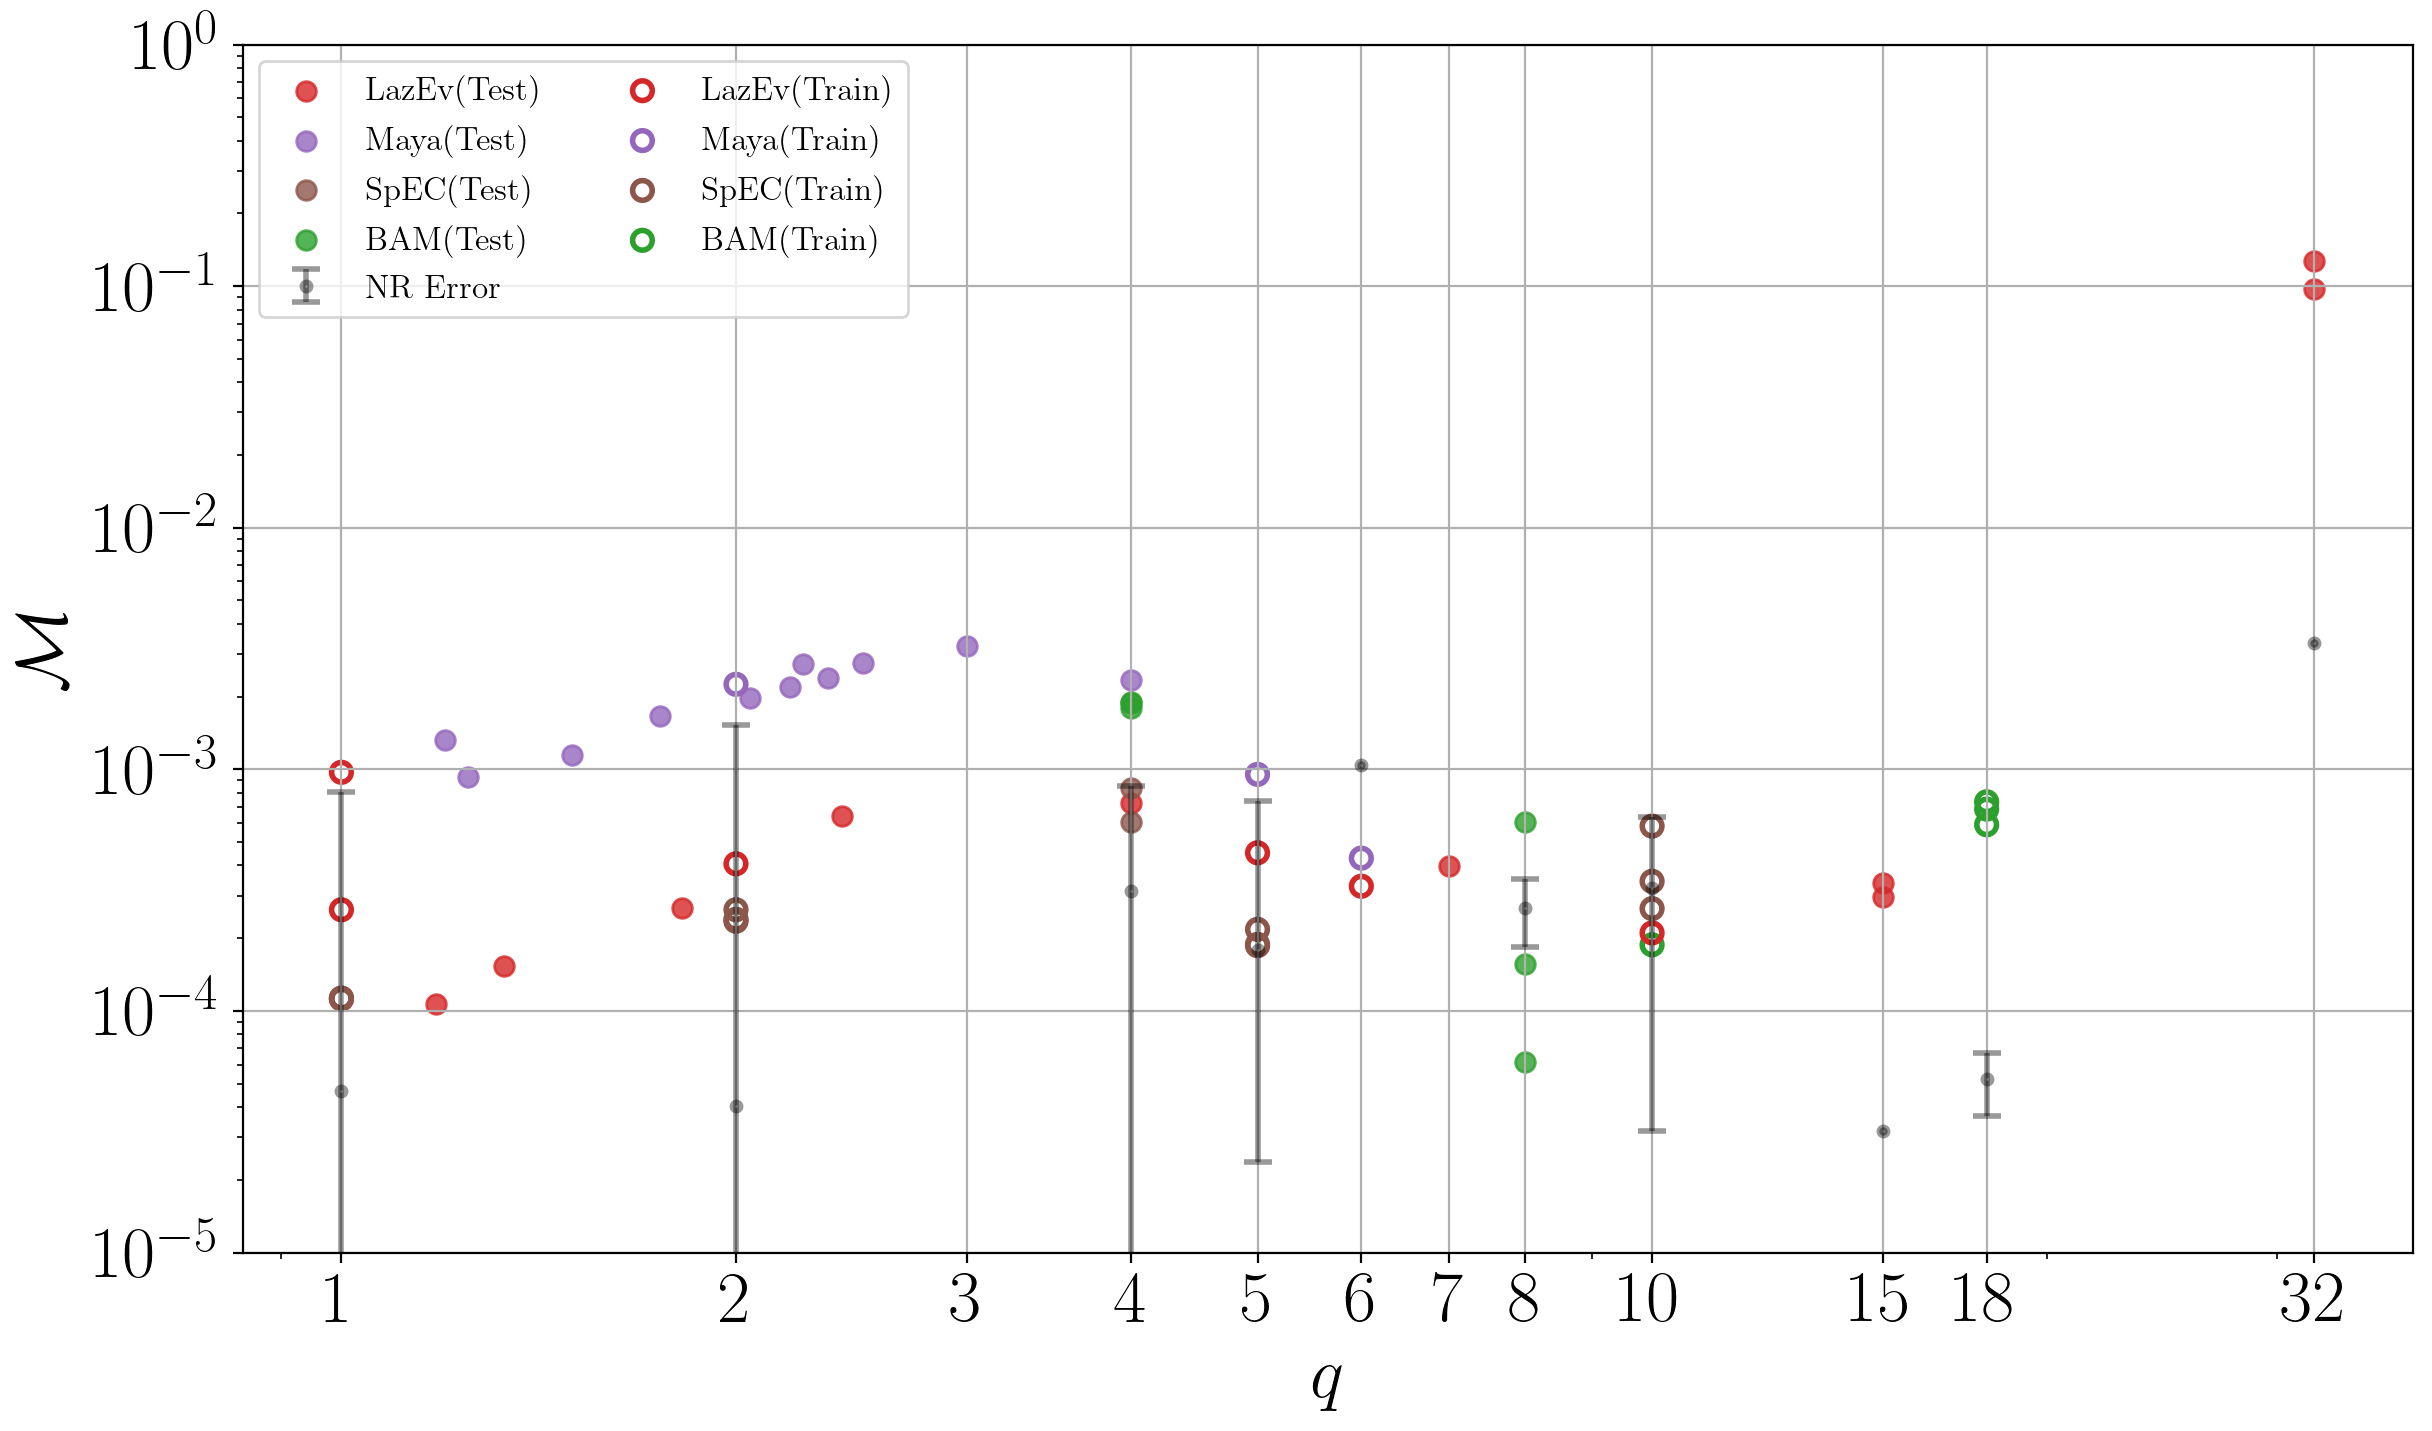

In [93]:
make_plot()

In [87]:
0.13 / 100

0.0013

In [89]:
0.0013/1.3e-3

1.0

In [63]:
0.019-0.015

0.004

In [64]:
mask = (df_predicted_mismatch['x'] >= 1) &  (df_predicted_mismatch['x'] <= 10)

In [65]:
df_predicted_mismatch[mask]['y'].mean() * 100

0.01962165972756108

In [66]:
(df_predicted_mismatch[mask]['y'].mean()-df_predicted_mismatch[mask]['y2_90'].mean()) * 100

0.015318048813335773

In [67]:
(df_predicted_mismatch[mask]['y1_90'].mean()-df_predicted_mismatch[mask]['y'].mean()) * 100

0.03974253044078649

In [68]:
df_predicted_mismatch[mask]['y1_90'].mean()

0.0005936419016834757

In [69]:
df_predicted_mismatch[mask]['y2_90'].mean() * 100

0.004303610914225309

In [77]:
(df_predicted_mismatch.query('x in [4,8,15,32]')['y1_90']-df_predicted_mismatch.query('x in [4,8,15,32]')['y2_90'])

12     0.000539
28     0.000529
56     0.004420
124    0.560496
dtype: float64

In [79]:
(df_predicted_mismatch.query('x in [4,8,15,32]')['y1_90']) * 100

12      0.059217
28      0.057873
56      0.452466
124    56.587321
Name: y1_90, dtype: float64

In [80]:
(df_predicted_mismatch.query('x in [4,8,15,32]')['y']) * 100

12      0.023173
28      0.021737
56      0.067089
124    28.107586
Name: y, dtype: float64

In [36]:
def predicted_mismatch_plot(logx=False, save=False):

    plt.rcParams.update({'font.size':26})
    plt.figure(figsize=(14, 8), dpi=200)

    # split because some NR do not have error bars
    mask = df_nr_error['yerr_low']>0
    plt.plot(df_nr_error[~mask]['x'], df_nr_error[~mask]['y'], 'ok', markeredgewidth=2, markersize=3, alpha=0.4)
    plt.errorbar(df_nr_error[mask]['x'], df_nr_error[mask]['y'], yerr=[df_nr_error[mask]['yerr_low'], df_nr_error[mask]['yerr_high']], fmt='ok', label="NR Error", alpha=0.4, mfc='none', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)
    
    # ####
    # https://matplotlib.org/stable/gallery/color/named_colors.html
    color='dodgerblue'
    # color='tab:blue'
    plt.plot(df_predicted_mismatch['x'], df_predicted_mismatch['y'], color=color, ls='-', label='Predicted Mismatch (median)')

    plt.fill_between(df_predicted_mismatch['x'], y1=df_predicted_mismatch['y1_99'], y2=df_predicted_mismatch['y2_99'], color=color, alpha=0.1, label=r'Predicted Mismatch ($99^{\rm{th}}\%$ width)')
    plt.fill_between(df_predicted_mismatch['x'], y1=df_predicted_mismatch['y1_90'], y2=df_predicted_mismatch['y2_90'], color=color, alpha=0.3, label=r'Predicted Mismatch ($90^{\rm{th}}\%$ width)')
    plt.fill_between(df_predicted_mismatch['x'], y1=df_predicted_mismatch['y1_50'], y2=df_predicted_mismatch['y2_50'], color=color, alpha=0.5, label=r'Predicted Mismatch ($50^{\rm{th}}\%$ width)')

    

    # split up the test data because
    # only some of them have error bars
    # plt.plot(df_test_set_no_error_bars['x'], df_test_set_no_error_bars['y'], 'oC1', markeredgewidth=2, markersize=3)
    # plt.errorbar(df_test_set_error_bars['x'], df_test_set_error_bars['y'], yerr=[df_test_set_error_bars['yerr_low'], df_test_set_error_bars['yerr_high']], fmt='oC1', label='Test', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)

    groups = df_test_results_non_agg.groupby(by='code').groups
    for i, code in enumerate(groups):
        x = df_test_results_non_agg.loc[groups[code]]['q']
        y = df_test_results_non_agg.loc[groups[code]]['mismatch']
        plt.scatter(x, y, label=code + "(Test)", marker='o', s=50, c=f'C{i+2}', lw=1, alpha=0.8)
        
    groups = df_train_results_non_agg.groupby(by='code').groups
    for i, code in enumerate(groups):
        x = df_train_results_non_agg.loc[groups[code]]['q']
        y = df_train_results_non_agg.loc[groups[code]]['mismatch']
        plt.scatter(x, y, label=code + "(Train)", marker='o', s=50, c='none', ec=f'C{i+2}', lw=2)
    
    
    # plt.errorbar(df_train_set_error_bars['x'], df_train_set_error_bars['y'], yerr=[df_train_set_error_bars['yerr_low'], df_train_set_error_bars['yerr_high']], fmt='oC0', label='Train', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)





    plt.yscale('log')
    # plt.title("Mismatch between NR and GPM Mean")
    plt.legend(loc='upper left', ncol=3, fontsize=12)
    plt.xlabel(r"$q$")
    plt.ylabel(r"$\mathcal{M}$")
    plt.ylim(1e-5, 1e0)
    # plt.grid(lw=0.5, c='k')
    plt.grid()

    ####

    ###


    ###


    if logx == True:
        plt.xscale('log')
        ax1 = plt.gca()
        ax1.set_xticks(df_plot_cal_xlabels['x'], df_plot_cal_xlabels['x']);
        output_filename="/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/mismatch_log.png"
    else:
        output_filename="/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/mismatch.png"

        
    # https://stackoverflow.com/questions/67033128/matplotlib-order-of-legend-entries
    # change the order of the legend to make it easiest to read
    handles,labels = plt.gca().get_legend_handles_labels()
    print(len(handles))
    print(labels)
    
    order = [0,1,2,3,12,5,6,7,4,9,10,11,8]
    handles = [handles[i] for i in order]
    labels = [labels[i] for i in order]

    plt.legend(handles,labels,loc='upper left', ncol=3, fontsize=12);
    # plt.legend(handles,labels,loc='lower right', labelspacing=0.25, handlelength=0.4, handletextpad=0.7)
        
        
    if save:
        plt.savefig(output_filename, bbox_inches='tight')

13
['Predicted Mismatch (median)', 'Predicted Mismatch ($99^{\\rm{th}}\\%$ width)', 'Predicted Mismatch ($90^{\\rm{th}}\\%$ width)', 'Predicted Mismatch ($50^{\\rm{th}}\\%$ width)', 'BAM(Test)', 'LazEv(Test)', 'Maya(Test)', 'SpEC(Test)', 'BAM(Train)', 'LazEv(Train)', 'Maya(Train)', 'SpEC(Train)', 'NR Error']


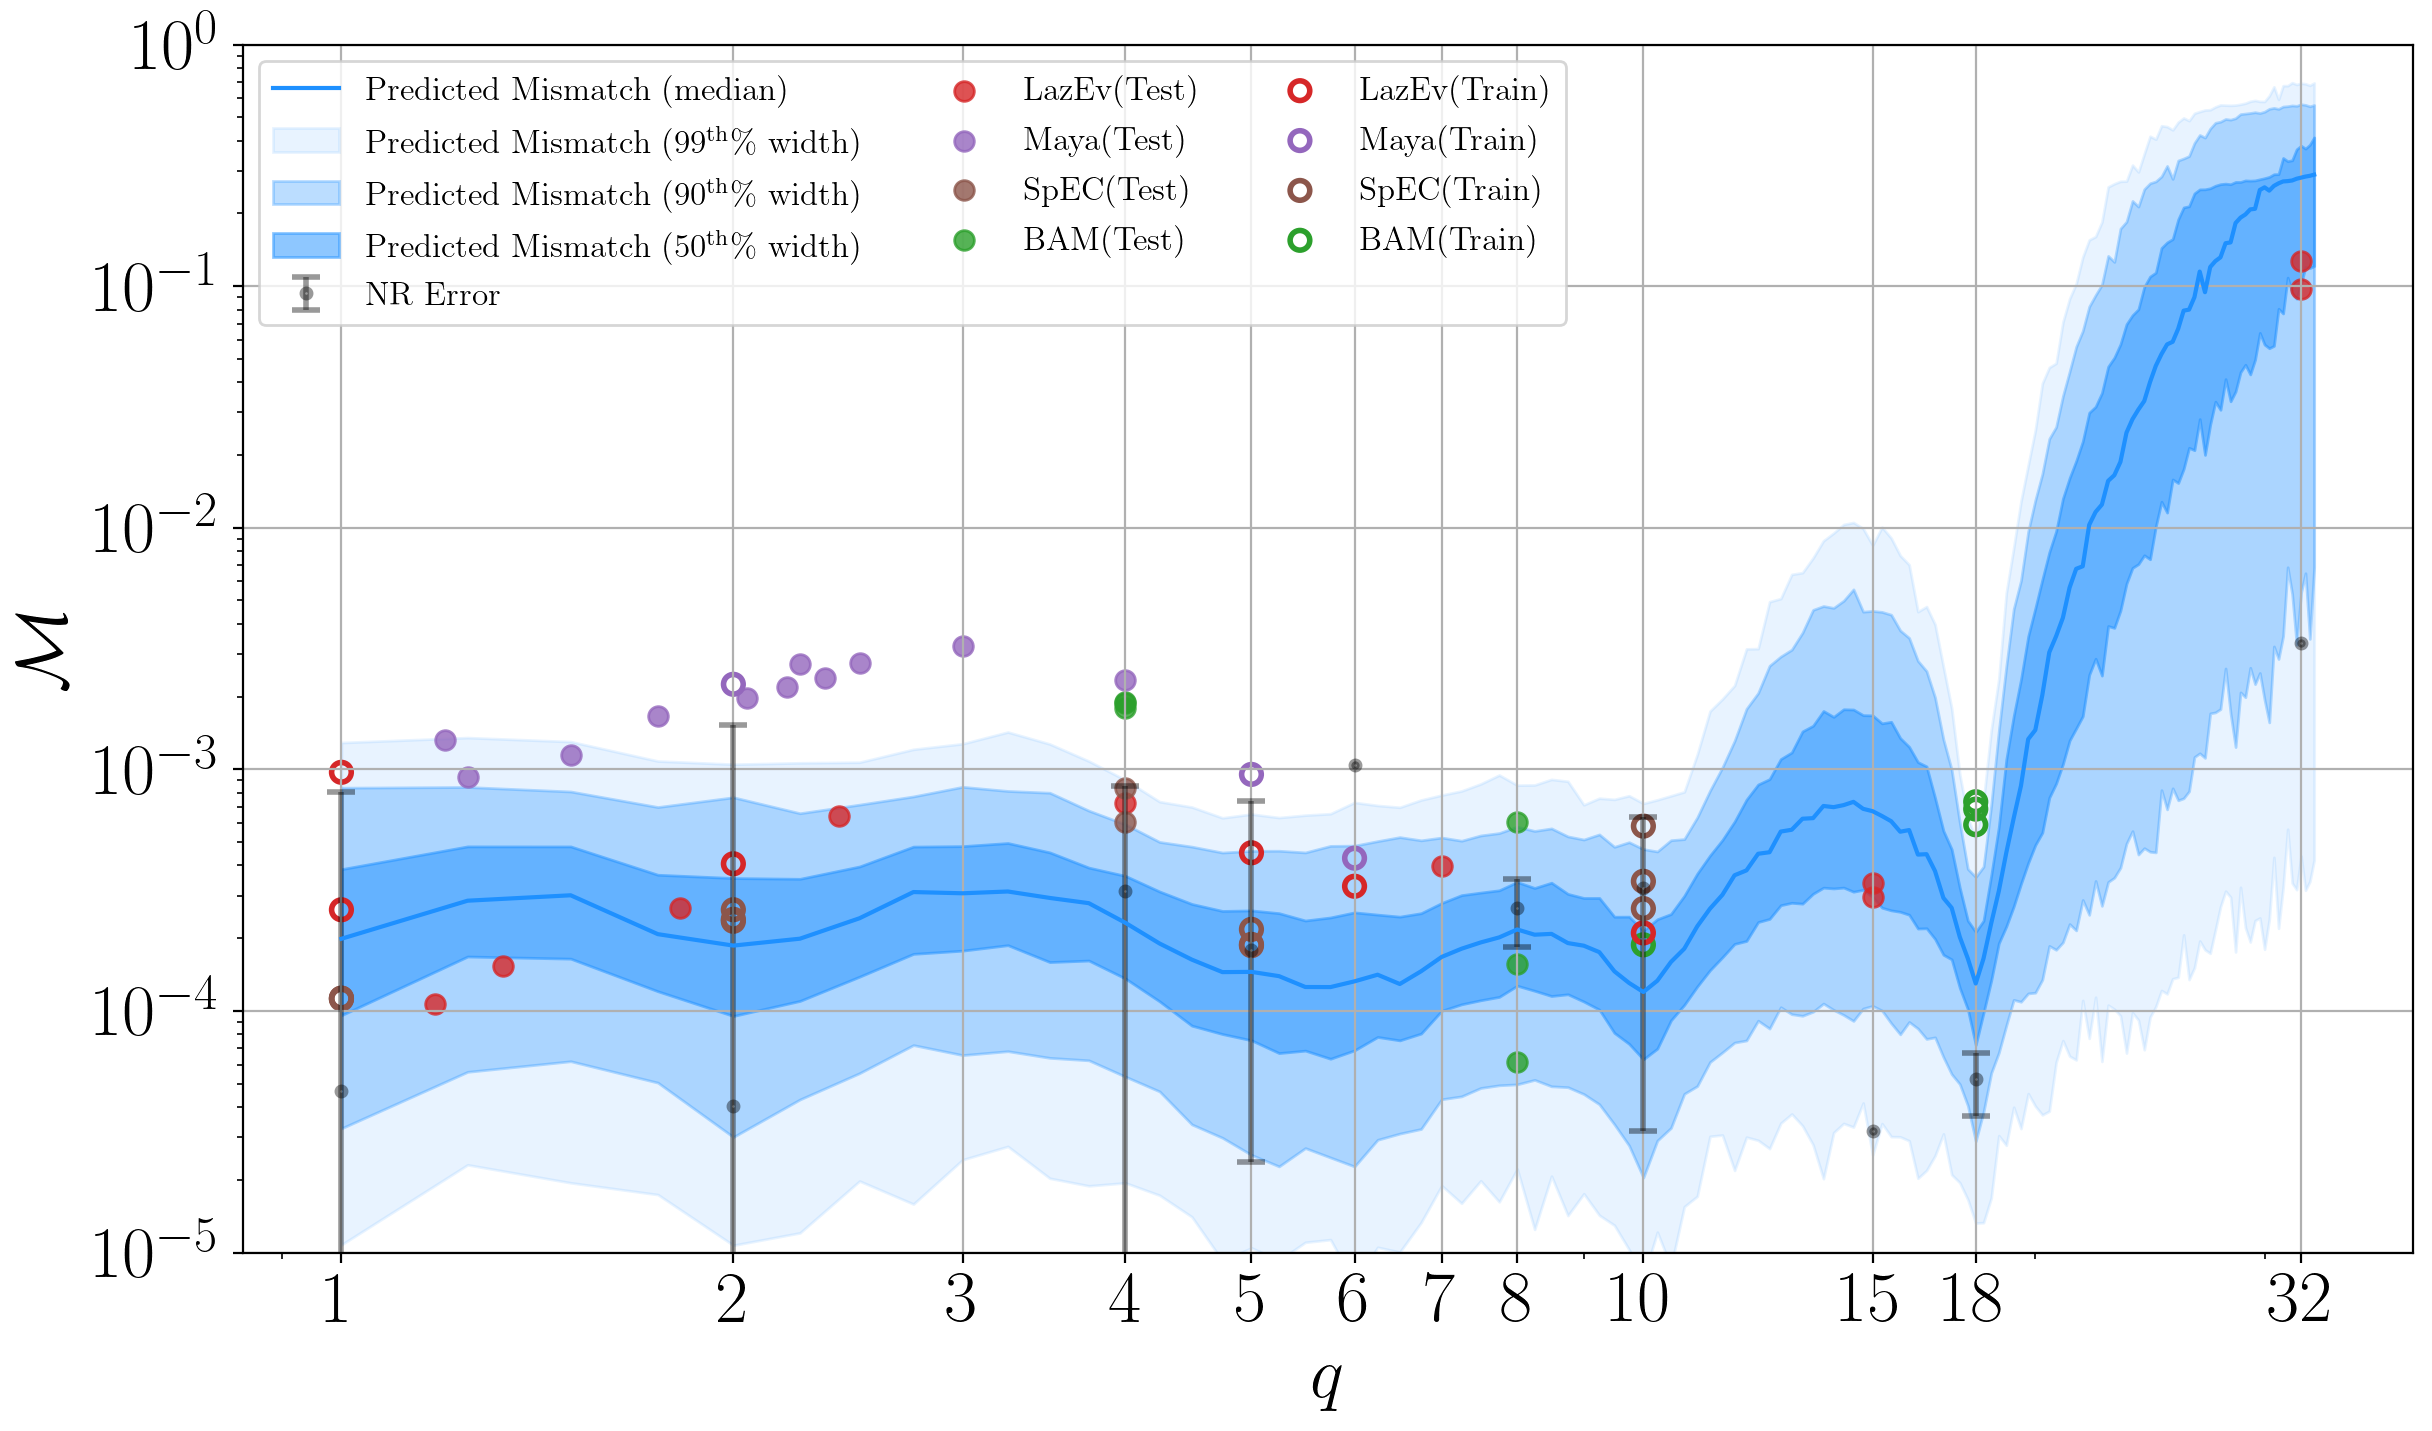

In [37]:
predicted_mismatch_plot(logx=True, save=False)

# old calibration plot (aggregated)

In [38]:
df_plot_cal_train

x         y  yerr_low  yerr_high
0   1.0  0.568057  0.433409   2.892468
1   2.0  1.407243  1.064846   7.314090
2   5.0  1.499525  1.026218   7.079169
3   6.0  2.855438  2.071916  13.813750
4  10.0  2.213721  1.646490  10.760150
5  18.0  5.271848  3.361076  18.435783

In [39]:
df_plot_cal_test

x          y  yerr_low  yerr_high
0    1.18   0.402731  0.276144   1.671030
1    1.20   4.862428  3.298179  20.087740
2    1.25   3.245662  2.147347  13.333926
3    1.33   0.504319  0.323240   2.063955
4    1.50   3.798147  2.385432  14.670575
5    1.75   7.977555  5.601622  24.864495
6    1.82   1.381747  1.007509   4.734065
7    2.05  10.539792  7.917070  54.522883
8    2.20  11.220447  7.981919  44.141355
9    2.25  13.660896  9.527846  49.574809
10   2.35  11.280186  7.690235  38.281482
11   2.41   2.915359  1.970151   9.844814
12   2.50  11.358437  7.511879  38.364401
13   3.00  10.507923  6.698234  38.612794
14   4.00   7.743243  4.713083  25.801939
15   7.00   2.379523  1.616726   6.859852
16   8.00   0.722610  0.451202   2.440199
17  15.00   0.473132  0.402978   2.552129
18  32.00   0.399819  0.201224  20.499090

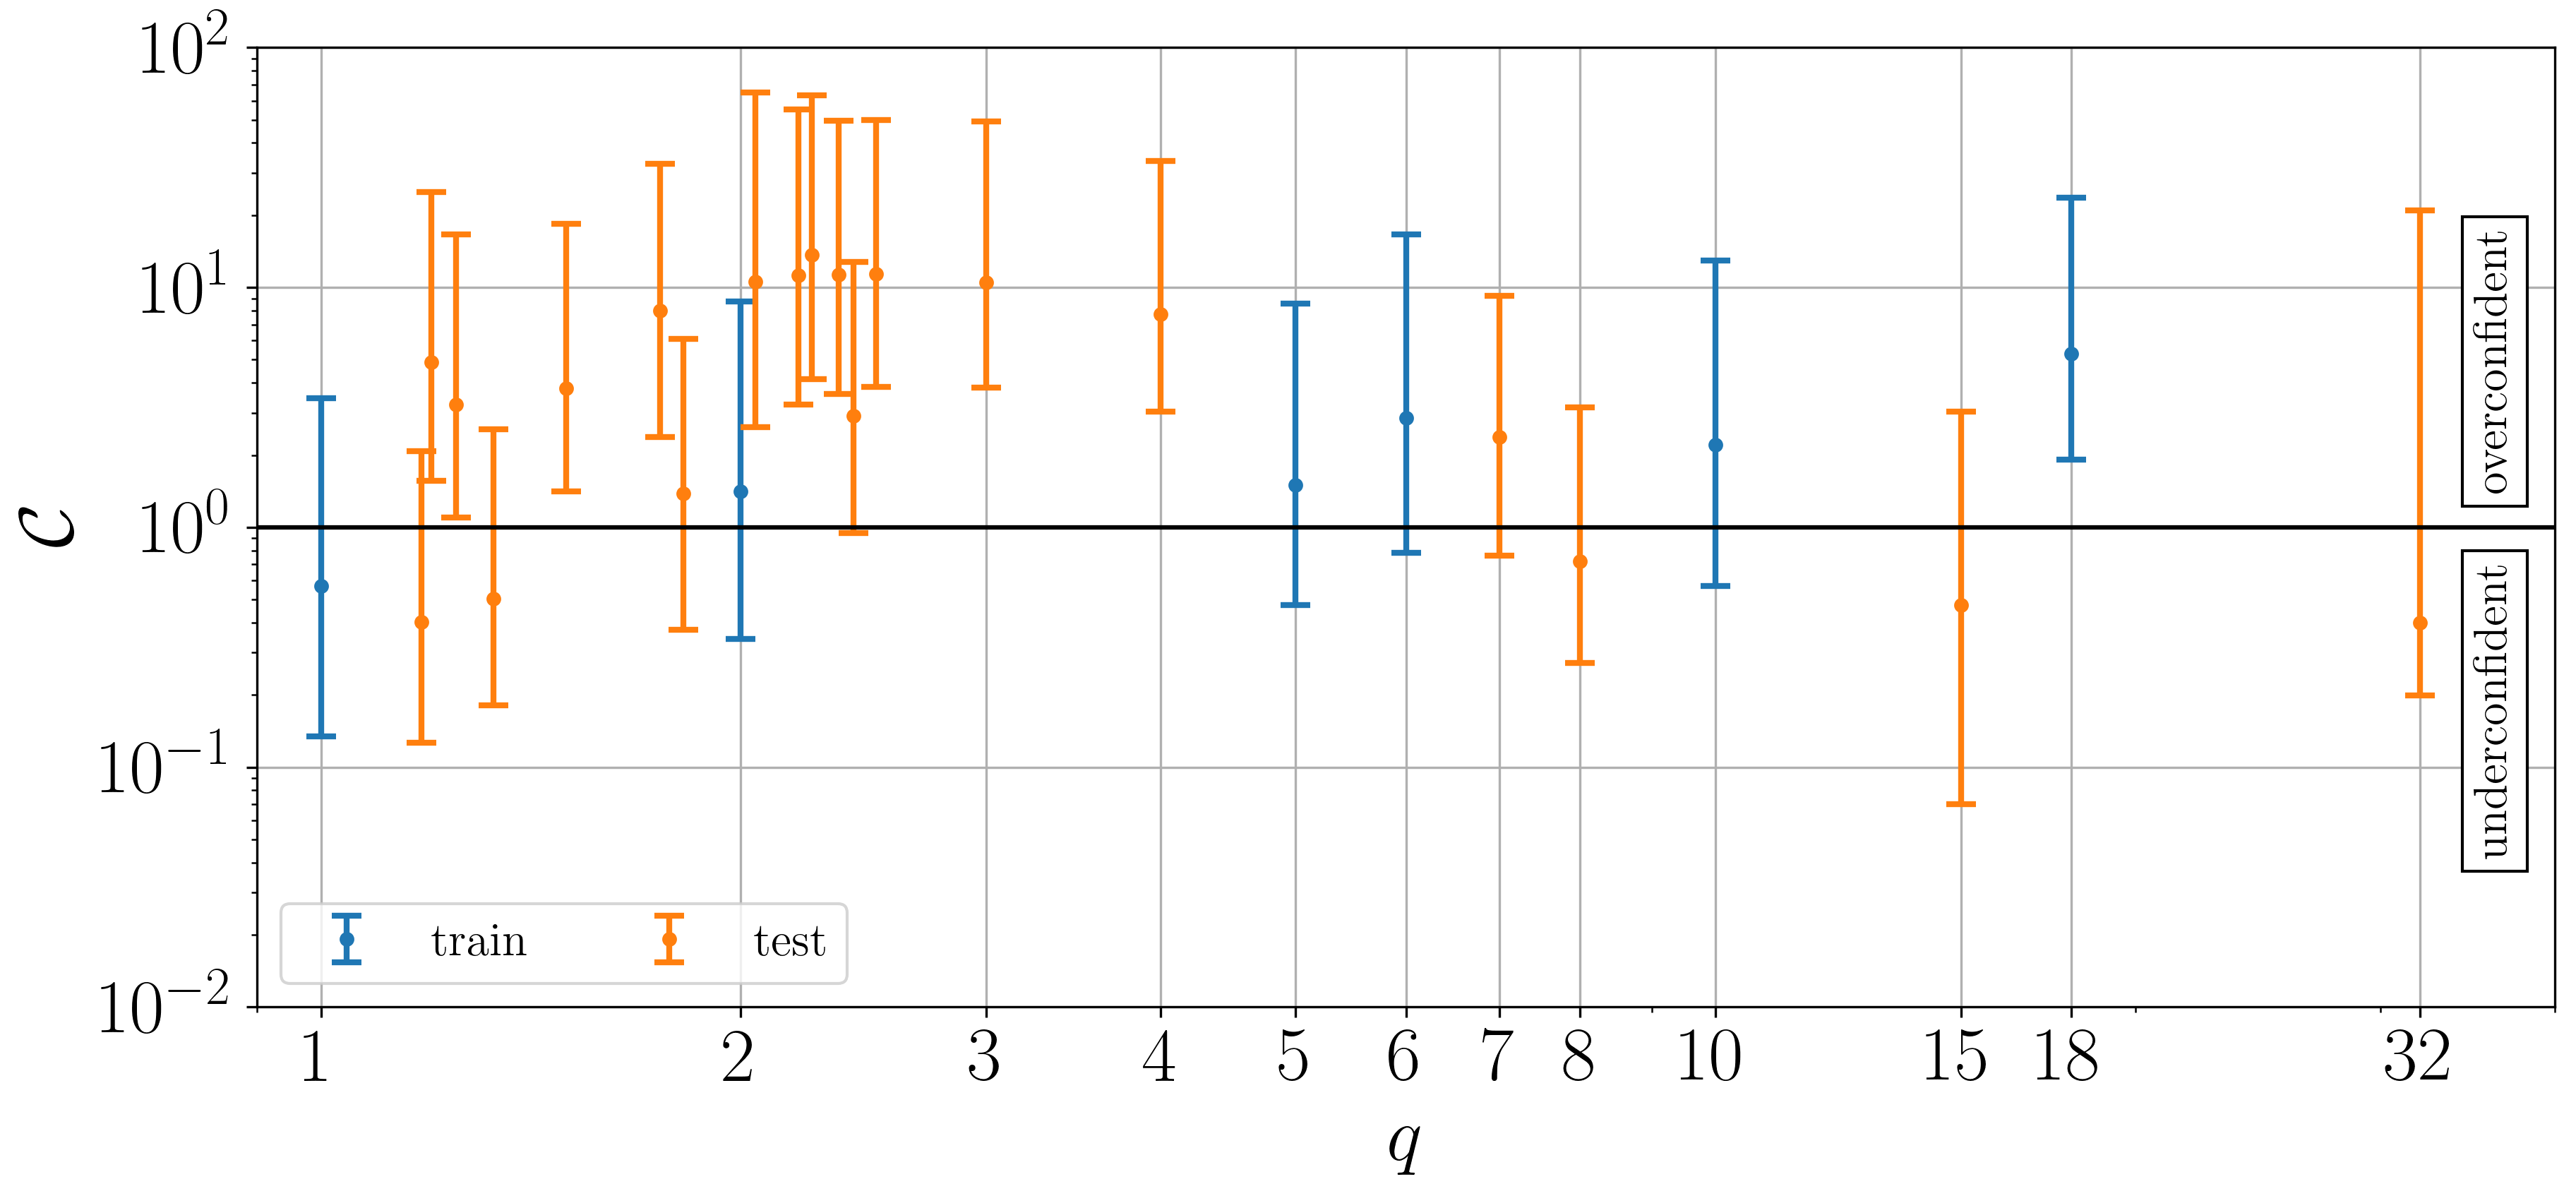

In [40]:
# plt.rcParams.update({'font.size':34})
plt.figure(figsize=(14, 6), dpi=300)
plt.errorbar(df_plot_cal_train['x'], df_plot_cal_train['y'], yerr=[df_plot_cal_train['yerr_low'], df_plot_cal_train['yerr_high']], fmt='oC0', label='train', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)
plt.errorbar(df_plot_cal_test['x'], df_plot_cal_test['y'], yerr=[df_plot_cal_test['yerr_low'], df_plot_cal_test['yerr_high']], fmt='oC1', label='test', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)


plt.axhline(1, c='k')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r"$\mathcal{C}$")
plt.xlabel(r"$q$")
plt.text(37.5, 1.5, 'overconfident', bbox=dict(facecolor='w', alpha=1.), horizontalalignment='right', rotation=90, fontsize=16)
plt.text(37.5, 0.045, 'underconfident', bbox=dict(facecolor='w', alpha=1.), horizontalalignment='right', rotation=90, fontsize=16)
plt.xlim(9e-1, 40)
plt.ylim(1e-2, 1e2)
plt.legend(loc='lower left', fontsize=16, ncol=2)
plt.grid()
ax1 = plt.gca()
ax1 = plt.gca()
ax1.set_xticks(df_plot_cal_xlabels['x'], df_plot_cal_xlabels['x']);
# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/calibration_plot.png", bbox_inches='tight')

# new calibration plot (not aggregated)

In [41]:
# calibration is the ratio of true / estimated error

In [42]:
i_self_err_median = IUS(df_predicted_mismatch['x'], df_predicted_mismatch['y'])

In [43]:
# evaluate self error on train and test set

In [44]:
df_test_results_non_agg['mismatch_pred_median'] = i_self_err_median(df_test_results_non_agg['q'])
df_test_results_non_agg['C_median'] = df_test_results_non_agg['mismatch']/df_test_results_non_agg['mismatch_pred_median']

In [45]:
df_train_results_non_agg['mismatch_pred_median'] = i_self_err_median(df_train_results_non_agg['q'])
df_train_results_non_agg['C_median'] = df_train_results_non_agg['mismatch']/df_train_results_non_agg['mismatch_pred_median']

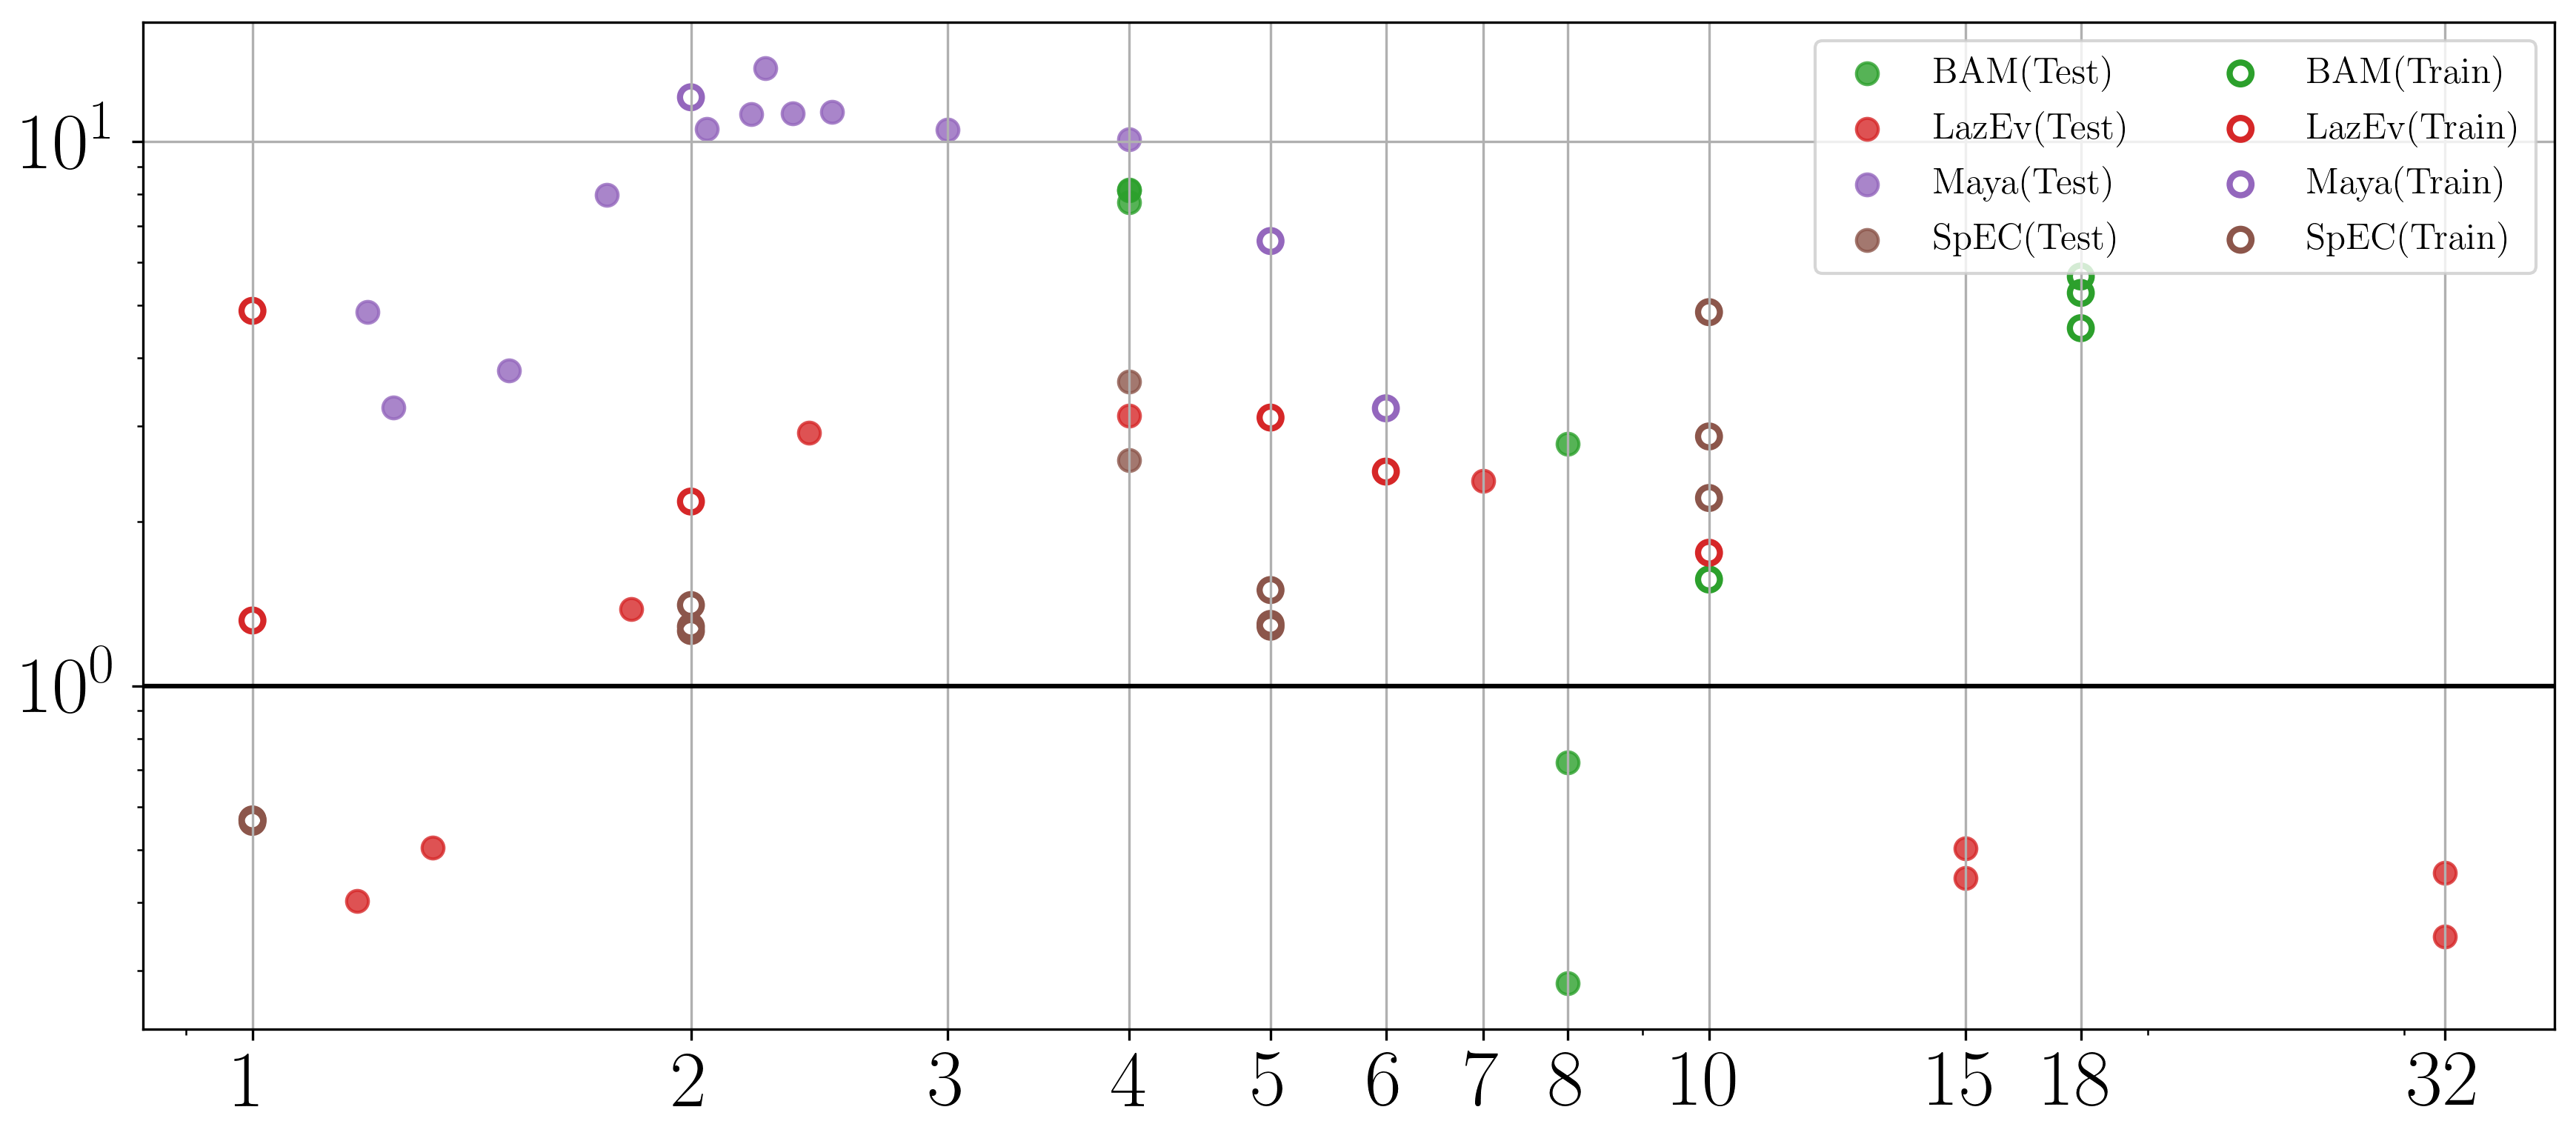

In [46]:
plt.figure(figsize=(14, 6), dpi=300)
# plt.scatter(df_train_results_non_agg['q'], df_train_results_non_agg['C_median'])
# plt.scatter(df_test_results_non_agg['q'], df_test_results_non_agg['C_median'])


groups = df_test_results_non_agg.groupby(by='code').groups
for i, code in enumerate(groups):
    x = df_test_results_non_agg.loc[groups[code]]['q']
    y = df_test_results_non_agg.loc[groups[code]]['C_median']
    plt.scatter(x, y, label=code + "(Test)", marker='o', s=50, c=f'C{i+2}', lw=1, alpha=0.8)

groups = df_train_results_non_agg.groupby(by='code').groups
for i, code in enumerate(groups):
    x = df_train_results_non_agg.loc[groups[code]]['q']
    y = df_train_results_non_agg.loc[groups[code]]['C_median']
    plt.scatter(x, y, label=code + "(Train)", marker='o', s=50, c='none', ec=f'C{i+2}', lw=2)


plt.yscale('log')
plt.xscale('log')
plt.axhline(1, c='k')
plt.grid()
ax1 = plt.gca()
ax1 = plt.gca()
ax1.set_xticks(df_plot_cal_xlabels['x'], df_plot_cal_xlabels['x']);
plt.legend(loc='upper right', fontsize=12, ncol=2);

10
['BAM(Test)', 'LazEv(Test)', 'Maya(Test)', 'SpEC(Test)', 'BAM(Train)', 'LazEv(Train)', 'Maya(Train)', 'SpEC(Train)', 'Train', 'Test']
[(0, 'BAM(Test)'), (1, 'LazEv(Test)'), (2, 'Maya(Test)'), (3, 'SpEC(Test)'), (4, 'BAM(Train)'), (5, 'LazEv(Train)'), (6, 'Maya(Train)'), (7, 'SpEC(Train)'), (8, 'Train'), (9, 'Test')]


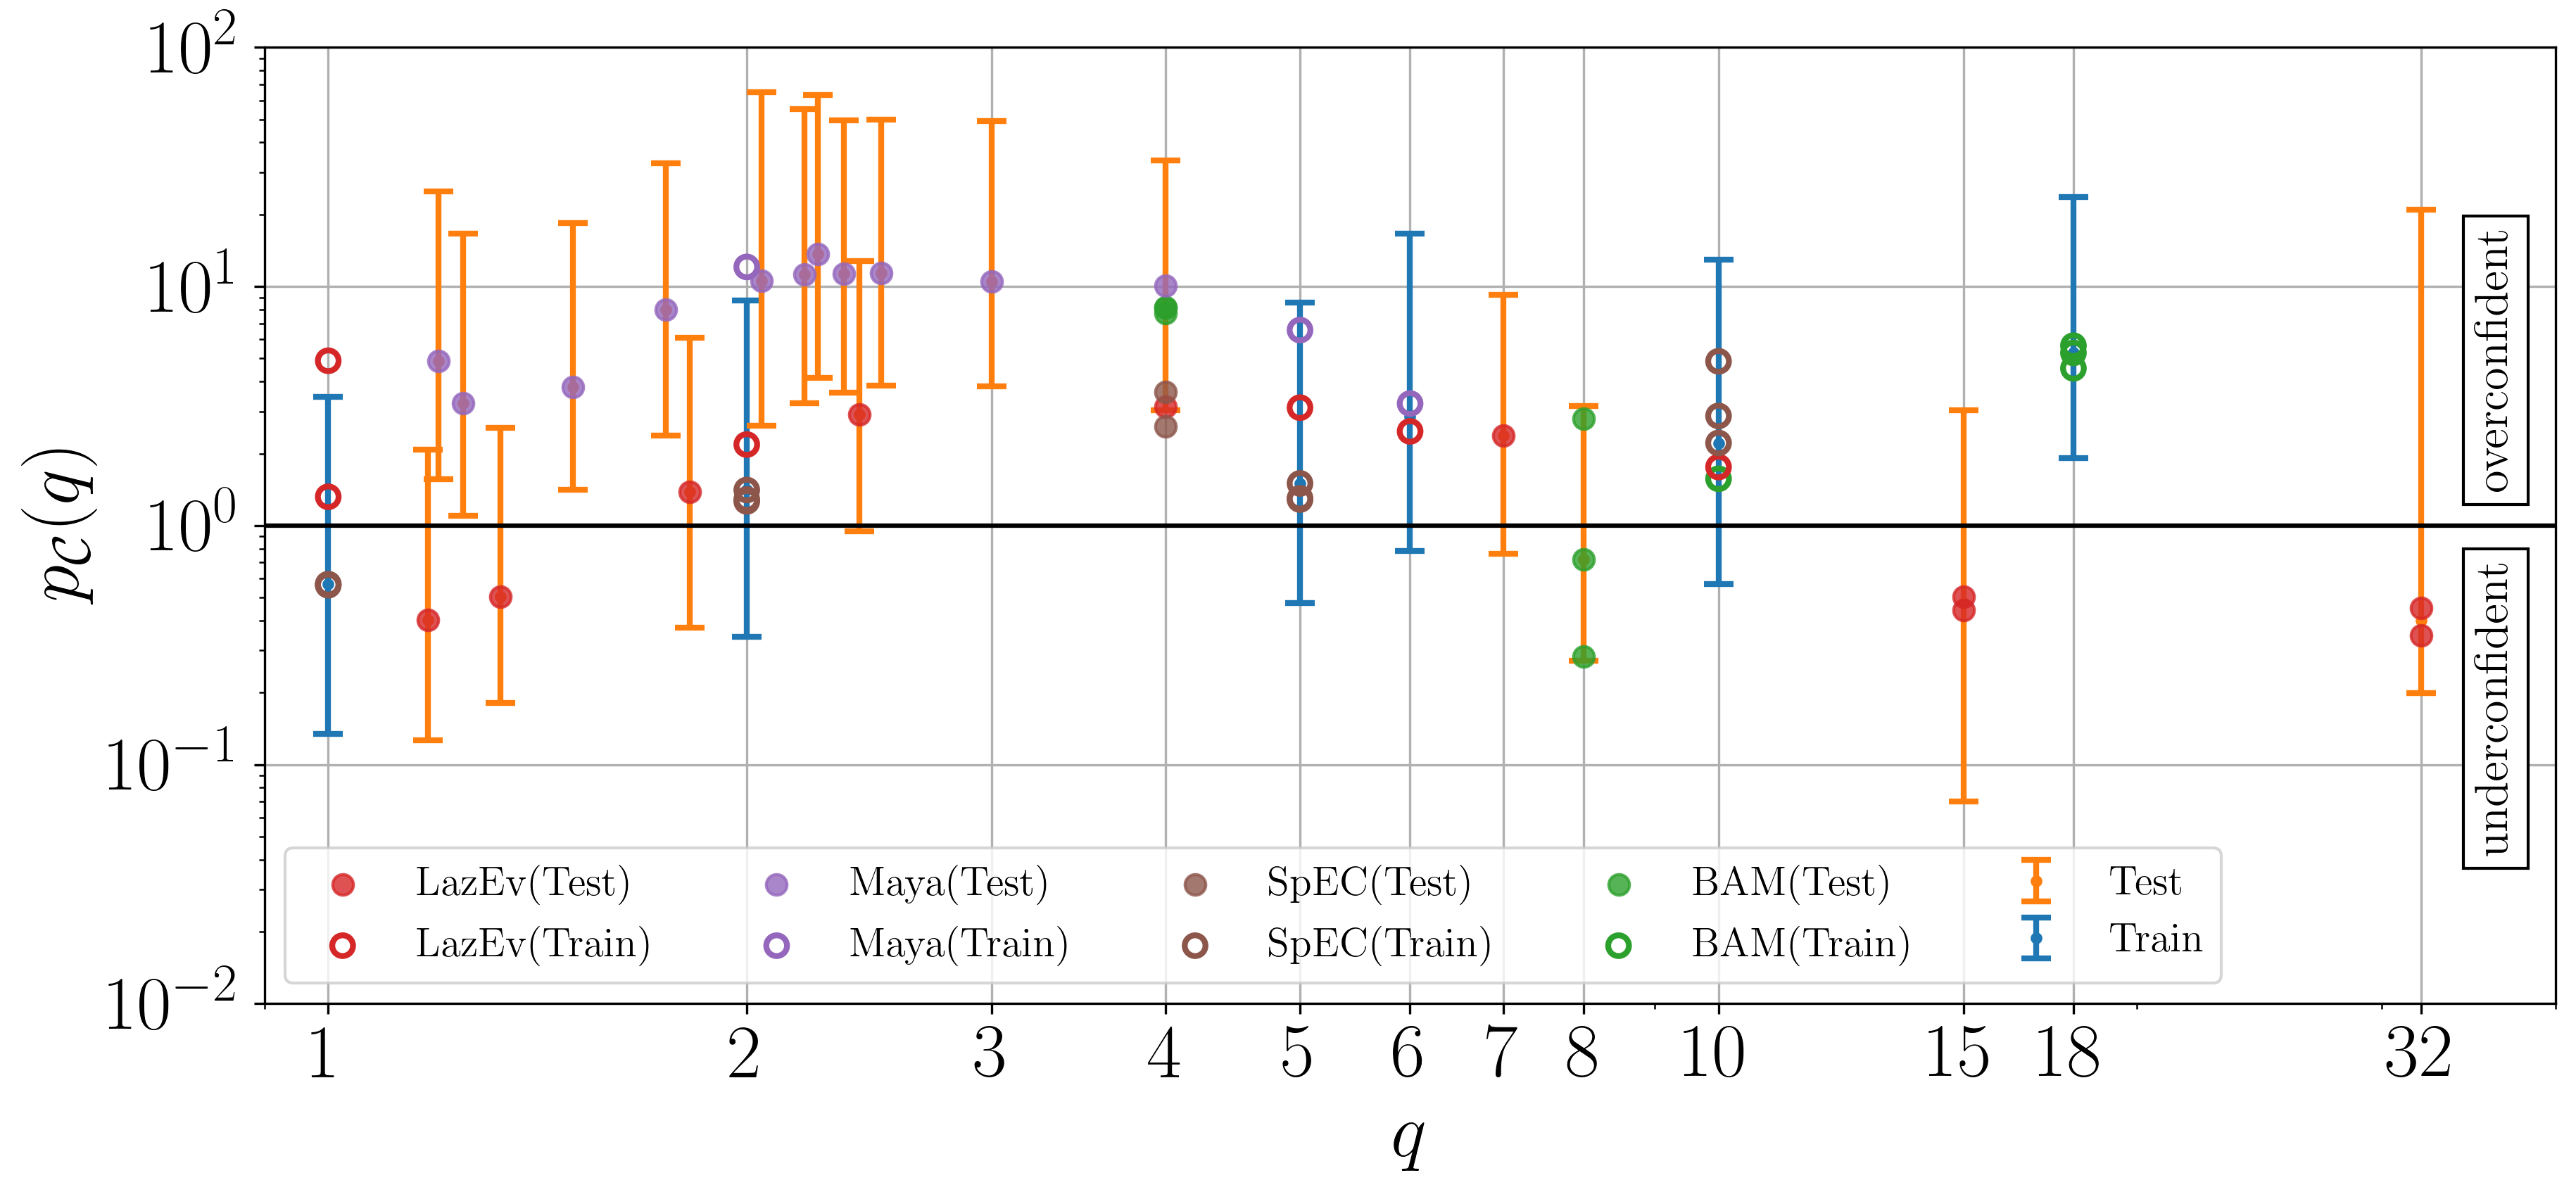

In [47]:
# plt.rcParams.update({'font.size':34})
plt.figure(figsize=(14, 6), dpi=300)
plt.errorbar(df_plot_cal_train['x'], df_plot_cal_train['y'], yerr=[df_plot_cal_train['yerr_low'], df_plot_cal_train['yerr_high']], fmt='oC0', label='Train', capsize=5, elinewidth=2, markeredgewidth=2, markersize=2, alpha=1)
plt.errorbar(df_plot_cal_test['x'], df_plot_cal_test['y'], yerr=[df_plot_cal_test['yerr_low'], df_plot_cal_test['yerr_high']], fmt='oC1', label='Test', capsize=5, elinewidth=2, markeredgewidth=2, markersize=2, alpha=1)



groups = df_test_results_non_agg.groupby(by='code').groups
for i, code in enumerate(groups):
    x = df_test_results_non_agg.loc[groups[code]]['q']
    y = df_test_results_non_agg.loc[groups[code]]['C_median']
    plt.scatter(x, y, label=code + "(Test)", marker='o', s=50, c=f'C{i+2}', lw=1, alpha=0.8, zorder=100)

groups = df_train_results_non_agg.groupby(by='code').groups
for i, code in enumerate(groups):
    x = df_train_results_non_agg.loc[groups[code]]['q']
    y = df_train_results_non_agg.loc[groups[code]]['C_median']
    plt.scatter(x, y, label=code + "(Train)", marker='o', s=50, c='none', ec=f'C{i+2}', lw=2, zorder=100)


plt.axhline(1, c='k')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r"$p_{\mathcal{C}}(q)$")
plt.xlabel(r"$q$")
plt.text(37.5, 1.5, 'overconfident', bbox=dict(facecolor='w', alpha=1.), horizontalalignment='right', rotation=90, fontsize=16)
plt.text(37.5, 0.045, 'underconfident', bbox=dict(facecolor='w', alpha=1.), horizontalalignment='right', rotation=90, fontsize=16)
plt.xlim(9e-1, 40)
plt.ylim(1e-2, 1e2)


# https://stackoverflow.com/questions/67033128/matplotlib-order-of-legend-entries
# change the order of the legend to make it easiest to read
handles,labels = plt.gca().get_legend_handles_labels()
print(len(handles))
print(labels)

print(list(zip(range(len(labels)), labels)))


order = [1,5,2,6,3,7,0,4,9,8]
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]

plt.legend(handles,labels, loc='lower left', fontsize=14, ncol=5);
plt.grid()
ax1 = plt.gca()
ax1.set_xticks(df_plot_cal_xlabels['x'], df_plot_cal_xlabels['x']);
# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/calibration_plot.png", bbox_inches='tight')